In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import openpyxl as opxl

from itertools import islice
from datetime import timedelta
from datetime import time

### Cargo metadata

In [22]:
# Probar cuando trae solamente un elemento en el arreglo, con strain solamente por ejemplo
data_str = open('MetaTest.json').read()
data = json.loads(data_str)

str

In [3]:
# Candidato 1

df_json = pd.read_json(data)
columns = [x+str(y) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'] for y in range(1,13)]
df_json.columns = columns
df_json.index = ['Strain', 'Media', 'DNA']
df_json

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Strain,"{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}",...,"{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}","{'name': 'data', 'value': 'Top10'}"
Media,"{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}","{'name': 'data', 'value': 'M9-glucosa'}",...,"{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}","{'name': 'data', 'value': 'M9-glicerol'}"
DNA,"{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'None'}","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'std:RFP/std:YFP/std...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...","{'name': 'data', 'value': 'pLux76:RFP/std:YFP/...",...,"{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pTet:YFP...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF...","{'name': 'data', 'value': 'pLux76:RFP/pLacI:YF..."


In [4]:
# Candidato 2

# Este funciona traspuesto. Candidato 1 mejor porque está en el mismo orden que el lector
"""
index = [x+str(y) for y in range(1,13) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
df_json = pd.read_json(data, orient='index')
df_json.columns = ['Strain', 'Media', 'DNA']
df_json.index = index
df_json
"""

"\nindex = [x+str(y) for y in range(1,13) for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]\ndf_json = pd.read_json(data, orient='index')\ndf_json.columns = ['Strain', 'Media', 'DNA']\ndf_json.index = index\ndf_json\n"

In [5]:
###########
# Esta info debe ser recibida al inicio de la carga de datos
file_name = 'ExpTest.xlsx'
experiment_name = os.path.basename(file_name).split('/')[-1].split('.')[0]
medidas = ['OD600:600', 'RFP-YFP:585/10,620/15', 'RFP-YFP:500/27,540/25', 'CFP:420/50,485/20', 'Results']
###########
wb = opxl.load_workbook(filename = file_name, data_only=True)
ws = wb['Data']
machine_name = ws['B'][8].value + str(ws['B'][9].value)

name_map = {'OD600:600':'OD', 'RFP-YFP:500/27,540/25':'YFP', 'CFP:420/50,485/20':'CFP',
'RFP-YFP:585/10,620/15':'RFP'}

### Cargo data

In [6]:
lista_rows = [(celda.value, celda.row, opxl.utils.column_index_from_string(celda.column)) 
              for celda in ws['A'] 
              if celda.value in medidas]
lista_rows

[('OD600:600', 47, 1),
 ('RFP-YFP:585/10,620/15', 148, 1),
 ('RFP-YFP:500/27,540/25', 249, 1),
 ('CFP:420/50,485/20', 350, 1),
 ('Results', 451, 1)]

In [7]:
ws.delete_rows(0, 48)

In [8]:
lista_rows2 = [(celda.value, celda.row, opxl.utils.column_index_from_string(celda.column)) 
              for celda in ws['A'] 
              if celda.value in medidas]
lista_rows2

[('RFP-YFP:585/10,620/15', 100, 1),
 ('RFP-YFP:500/27,540/25', 201, 1),
 ('CFP:420/50,485/20', 302, 1),
 ('Results', 403, 1)]

In [9]:
data = ws.values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df = pd.DataFrame(data, columns=cols)

In [10]:
df.columns = df.columns.map(lambda x: x.replace('T° OD600:600', 'T°'))

In [11]:
df_OD = pd.DataFrame(df.iloc[0:lista_rows2[0][1] - 3])
df_OD['name'] = 'OD'

df_RFP = pd.DataFrame(df.iloc[lista_rows2[0][1] + 1:lista_rows2[1][1] - 3])
df_RFP['name'] = 'RFP'
df_RFP.index = range(97)

df_YFP = pd.DataFrame(df.iloc[lista_rows2[1][1] + 1:lista_rows2[2][1] - 3])
df_YFP['name'] = 'YFP'
df_YFP.index = range(97)

df_CFP = pd.DataFrame(df.iloc[lista_rows2[2][1] + 1:lista_rows2[3][1] - 3])
df_CFP['name'] = 'CFP'
df_CFP.index = range(97)

In [12]:
# Código para arreglar los tiempos, si es que necesario
#t = df_OD['Time'].loc[0]
#t.minute
#t2 = time(t.minute-11)
#t2
#for i in df_OD.columns[2:-1]:
    #print("row {}, column {}".format(i[0], i[1]))

### Guardar en BD

De más a menos:

1) Tabla Experiment => Meta experimento: Nombre experimento, (fecha? se puede ingresar en el front), Info máquina

2) Tabla Sample => Meta platillo: row, col, media, strain.

3) Tabla DNA => Meta DNA: name

4) Tabla Measurements => Data measurements: name, value, time

In [13]:
df_OD
# Arreglar el último registro
df_OD = df_OD.drop([96])

In [14]:
df_OD

,Time,T°,A1,A2,A3,A4,A5,A6,A7,A8,...,H4,H5,H6,H7,H8,H9,H10,H11,H12,name
0,00:11:40,37,0.082,0.083,0.083,0.082,0.082,0.082,0.083,0.083,...,0.082,0.084,0.082,0.087,0.082,0.082,0.083,0.08,0.083,OD
1,00:26:40,37,0.082,0.083,0.084,0.082,0.083,0.082,0.083,0.083,...,0.082,0.084,0.082,0.087,0.082,0.082,0.083,0.08,0.083,OD
2,00:41:40,37,0.082,0.084,0.084,0.082,0.083,0.083,0.084,0.084,...,0.082,0.084,0.082,0.088,0.083,0.082,0.083,0.081,0.084,OD
3,00:56:40,37,0.082,0.085,0.084,0.082,0.084,0.083,0.085,0.084,...,0.083,0.084,0.082,0.089,0.083,0.083,0.083,0.081,0.084,OD
4,01:11:40,37,0.082,0.085,0.085,0.082,0.084,0.084,0.086,0.085,...,0.083,0.084,0.082,0.09,0.083,0.083,0.083,0.081,0.084,OD
5,01:26:40,37,0.081,0.086,0.086,0.083,0.085,0.085,0.087,0.086,...,0.083,0.084,0.082,0.09,0.084,0.083,0.083,0.081,0.085,OD
6,01:41:40,37,0.081,0.088,0.087,0.083,0.085,0.086,0.089,0.087,...,0.083,0.084,0.082,0.09,0.084,0.083,0.084,0.082,0.085,OD
7,01:56:40,37,0.081,0.089,0.088,0.084,0.086,0.088,0.091,0.089,...,0.083,0.085,0.083,0.09,0.084,0.084,0.084,0.082,0.085,OD
8,02:11:40,37,0.081,0.092,0.09,0.084,0.088,0.09,0.094,0.092,...,0.083,0.085,0.083,0.09,0.085,0.084,0.085,0.083,0.085,OD
9,02:26:40,37,0.081,0.095,0.092,0.085,0.09,0.092,0.097,0.096,...,0.084,0.085,0.083,0.087,0.085,0.085,0.085,0.083,0.085,OD


In [15]:
# 1) Experiment
experiment_name
machine_name
# Crear objeto experiment
# e.save()

'Synergy HTX15070916'

In [27]:
# 2) Sample
# get experiment_id
# row, col, media, strain

# 3) DNA
# name

# Empiezo a recorrer los platillos que están en df_json: indexes: strain, media, dna:
for col_name, col_serie in df_json.iteritems():
    # experiment_id
    plate_row = col_name[0]
    plate_col = col_name[1]
    strain = col_serie['Strain']['value']
    media = col_serie['Media']['value']
    # Crear objeto Sample
    # s.save()
    
    # get sample_id
    DNA = col_serie['DNA']['value']
    # Crear objeto DNA
    # d.save()
    
    # 4) Measurement
    # name, value, time
    for i, value in enumerate(df_OD[col_name]):
        name = df_OD['name'].iloc[i]
        val = value
        time = df_OD['Time'].iloc[i]
    #sample_id
    
    # Crear objeto measurement
    # m.save()

In [24]:
for col_name, col_serie in df_json.iteritems():
    for i, value in enumerate(df_OD[col_name]):
        print(df_OD['name'].iloc[i])
        print(value)
        print(df_OD['Time'].iloc[i])

OD
0.082
00:11:40
OD
0.082
00:26:40
OD
0.082
00:41:40
OD
0.082
00:56:40
OD
0.082
01:11:40
OD
0.081
01:26:40
OD
0.081
01:41:40
OD
0.081
01:56:40
OD
0.081
02:11:40
OD
0.081
02:26:40
OD
0.082
02:41:40
OD
0.081
02:56:40
OD
0.081
03:11:40
OD
0.081
03:26:40
OD
0.081
03:41:40
OD
0.081
03:56:40
OD
0.081
04:11:40
OD
0.081
04:26:40
OD
0.081
04:41:40
OD
0.081
04:56:40
OD
0.081
05:11:40
OD
0.081
05:26:40
OD
0.081
05:41:40
OD
0.082
05:56:40
OD
0.081
06:11:40
OD
0.081
06:26:40
OD
0.081
06:41:40
OD
0.082
06:56:40
OD
0.081
07:11:40
OD
0.082
07:26:40
OD
0.081
07:41:40
OD
0.081
07:56:40
OD
0.081
08:11:40
OD
0.081
08:26:40
OD
0.081
08:41:40
OD
0.081
08:56:40
OD
0.082
09:11:40
OD
0.081
09:26:40
OD
0.082
09:41:40
OD
0.082
09:56:40
OD
0.082
10:11:40
OD
0.081
10:26:40
OD
0.081
10:41:40
OD
0.082
10:56:40
OD
0.081
11:11:40
OD
0.081
11:26:40
OD
0.082
11:41:40
OD
0.081
11:56:40
OD
0.081
12:11:40
OD
0.082
12:26:40
OD
0.081
12:41:40
OD
0.082
12:56:40
OD
0.081
13:11:40
OD
0.081
13:26:40
OD
0.081
13:41:40
OD
0.081
1

12:26:40
OD
0.828
12:41:40
OD
0.837
12:56:40
OD
0.842
13:11:40
OD
0.844
13:26:40
OD
0.85
13:41:40
OD
0.856
13:56:40
OD
0.863
14:11:40
OD
0.872
14:26:40
OD
0.87
14:41:40
OD
0.872
14:56:40
OD
0.883
15:11:40
OD
0.884
15:26:40
OD
0.886
15:41:40
OD
0.894
15:56:40
OD
0.899
16:11:40
OD
0.893
16:26:40
OD
0.896
16:41:40
OD
0.897
16:56:40
OD
0.887
17:11:40
OD
0.887
17:26:40
OD
0.894
17:41:40
OD
0.911
17:56:40
OD
0.933
18:11:40
OD
0.915
18:26:40
OD
0.909
18:41:40
OD
0.906
18:56:40
OD
0.901
19:11:40
OD
0.898
19:26:40
OD
0.896
19:41:40
OD
0.897
19:56:40
OD
0.93
20:11:40
OD
0.938
20:26:40
OD
0.937
20:41:40
OD
0.95
20:56:40
OD
0.961
21:11:40
OD
0.961
21:26:40
OD
0.947
21:41:40
OD
0.948
21:56:40
OD
0.942
22:11:40
OD
0.929
22:26:40
OD
0.92
22:41:40
OD
0.915
22:56:40
OD
0.914
23:11:40
OD
0.918
23:26:40
OD
0.925
23:41:40
OD
0.93
23:56:40
OD
0.083
00:11:40
OD
0.084
00:26:40
OD
0.084
00:41:40
OD
0.085
00:56:40
OD
0.087
01:11:40
OD
0.088
01:26:40
OD
0.09
01:41:40
OD
0.093
01:56:40
OD
0.096
02:11:40
OD
0.101

04:41:40
OD
0.198
04:56:40
OD
0.227
05:11:40
OD
0.264
05:26:40
OD
0.306
05:41:40
OD
0.349
05:56:40
OD
0.398
06:11:40
OD
0.449
06:26:40
OD
0.501
06:41:40
OD
0.556
06:56:40
OD
0.598
07:11:40
OD
0.631
07:26:40
OD
0.655
07:41:40
OD
0.659
07:56:40
OD
0.656
08:11:40
OD
0.659
08:26:40
OD
0.665
08:41:40
OD
0.672
08:56:40
OD
0.693
09:11:40
OD
0.708
09:26:40
OD
0.714
09:41:40
OD
0.731
09:56:40
OD
0.735
10:11:40
OD
0.736
10:26:40
OD
0.741
10:41:40
OD
0.755
10:56:40
OD
0.76
11:11:40
OD
0.789
11:26:40
OD
0.812
11:41:40
OD
0.817
11:56:40
OD
0.82
12:11:40
OD
0.813
12:26:40
OD
0.82
12:41:40
OD
0.838
12:56:40
OD
0.833
13:11:40
OD
0.839
13:26:40
OD
0.848
13:41:40
OD
0.849
13:56:40
OD
0.843
14:11:40
OD
0.845
14:26:40
OD
0.838
14:41:40
OD
0.836
14:56:40
OD
0.838
15:11:40
OD
0.834
15:26:40
OD
0.835
15:41:40
OD
0.835
15:56:40
OD
0.839
16:11:40
OD
0.831
16:26:40
OD
0.831
16:41:40
OD
0.829
16:56:40
OD
0.818
17:11:40
OD
0.815
17:26:40
OD
0.814
17:41:40
OD
0.822
17:56:40
OD
0.839
18:11:40
OD
0.821
18:26:40
OD
0

OD
0.905
21:11:40
OD
0.903
21:26:40
OD
0.893
21:41:40
OD
0.892
21:56:40
OD
0.888
22:11:40
OD
0.881
22:26:40
OD
0.874
22:41:40
OD
0.87
22:56:40
OD
0.869
23:11:40
OD
0.87
23:26:40
OD
0.871
23:41:40
OD
0.873
23:56:40
OD
0.085
00:11:40
OD
0.086
00:26:40
OD
0.087
00:41:40
OD
0.088
00:56:40
OD
0.089
01:11:40
OD
0.091
01:26:40
OD
0.094
01:41:40
OD
0.097
01:56:40
OD
0.102
02:11:40
OD
0.108
02:26:40
OD
0.115
02:41:40
OD
0.124
02:56:40
OD
0.135
03:11:40
OD
0.15
03:26:40
OD
0.168
03:41:40
OD
0.194
03:56:40
OD
0.227
04:11:40
OD
0.266
04:26:40
OD
0.315
04:41:40
OD
0.366
04:56:40
OD
0.422
05:11:40
OD
0.483
05:26:40
OD
0.547
05:41:40
OD
0.607
05:56:40
OD
0.665
06:11:40
OD
0.714
06:26:40
OD
0.739
06:41:40
OD
0.743
06:56:40
OD
0.744
07:11:40
OD
0.754
07:26:40
OD
0.751
07:41:40
OD
0.76
07:56:40
OD
0.766
08:11:40
OD
0.77
08:26:40
OD
0.777
08:41:40
OD
0.782
08:56:40
OD
0.793
09:11:40
OD
0.795
09:26:40
OD
0.802
09:41:40
OD
0.807
09:56:40
OD
0.811
10:11:40
OD
0.817
10:26:40
OD
0.822
10:41:40
OD
0.823
10:56:

OD
0.977
13:26:40
OD
0.987
13:41:40
OD
0.989
13:56:40
OD
0.983
14:11:40
OD
0.988
14:26:40
OD
0.993
14:41:40
OD
0.987
14:56:40
OD
0.999
15:11:40
OD
1.008
15:26:40
OD
0.999
15:41:40
OD
1.014
15:56:40
OD
1.012
16:11:40
OD
1.002
16:26:40
OD
1.003
16:41:40
OD
1.002
16:56:40
OD
0.985
17:11:40
OD
0.985
17:26:40
OD
0.991
17:41:40
OD
1.008
17:56:40
OD
1.017
18:11:40
OD
1.013
18:26:40
OD
1.004
18:41:40
OD
0.994
18:56:40
OD
0.982
19:11:40
OD
0.977
19:26:40
OD
0.971
19:41:40
OD
0.969
19:56:40
OD
1.007
20:11:40
OD
1.024
20:26:40
OD
1.028
20:41:40
OD
1.038
20:56:40
OD
1.041
21:11:40
OD
1.048
21:26:40
OD
1.041
21:41:40
OD
1.041
21:56:40
OD
1.037
22:11:40
OD
1.016
22:26:40
OD
0.998
22:41:40
OD
0.988
22:56:40
OD
0.99
23:11:40
OD
1
23:26:40
OD
1.01
23:41:40
OD
1.024
23:56:40
OD
0.083
00:11:40
OD
0.083
00:26:40
OD
0.084
00:41:40
OD
0.085
00:56:40
OD
0.085
01:11:40
OD
0.086
01:26:40
OD
0.087
01:41:40
OD
0.089
01:56:40
OD
0.092
02:11:40
OD
0.095
02:26:40
OD
0.1
02:41:40
OD
0.104
02:56:40
OD
0.112
03:11:40


0.625
05:41:40
OD
0.709
05:56:40
OD
0.781
06:11:40
OD
0.826
06:26:40
OD
0.826
06:41:40
OD
0.829
06:56:40
OD
0.823
07:11:40
OD
0.814
07:26:40
OD
0.818
07:41:40
OD
0.817
07:56:40
OD
0.815
08:11:40
OD
0.82
08:26:40
OD
0.831
08:41:40
OD
0.849
08:56:40
OD
0.864
09:11:40
OD
0.874
09:26:40
OD
0.878
09:41:40
OD
0.896
09:56:40
OD
0.906
10:11:40
OD
0.907
10:26:40
OD
0.913
10:41:40
OD
0.927
10:56:40
OD
0.929
11:11:40
OD
0.951
11:26:40
OD
0.967
11:41:40
OD
0.971
11:56:40
OD
0.974
12:11:40
OD
0.966
12:26:40
OD
0.969
12:41:40
OD
0.982
12:56:40
OD
0.981
13:11:40
OD
0.988
13:26:40
OD
0.994
13:41:40
OD
0.994
13:56:40
OD
0.992
14:11:40
OD
0.996
14:26:40
OD
0.993
14:41:40
OD
0.993
14:56:40
OD
1.001
15:11:40
OD
1.001
15:26:40
OD
1
15:41:40
OD
1.007
15:56:40
OD
1.011
16:11:40
OD
1.006
16:26:40
OD
1.006
16:41:40
OD
1.006
16:56:40
OD
0.995
17:11:40
OD
0.995
17:26:40
OD
1
17:41:40
OD
1.014
17:56:40
OD
1.031
18:11:40
OD
1.014
18:26:40
OD
1.01
18:41:40
OD
1.002
18:56:40
OD
0.996
19:11:40
OD
0.992
19:26:40
OD
0.

0.779
21:56:40
OD
0.772
22:11:40
OD
0.762
22:26:40
OD
0.75
22:41:40
OD
0.742
22:56:40
OD
0.743
23:11:40
OD
0.747
23:26:40
OD
0.752
23:41:40
OD
0.753
23:56:40
OD
0.082
00:11:40
OD
0.082
00:26:40
OD
0.082
00:41:40
OD
0.082
00:56:40
OD
0.082
01:11:40
OD
0.082
01:26:40
OD
0.082
01:41:40
OD
0.082
01:56:40
OD
0.082
02:11:40
OD
0.083
02:26:40
OD
0.083
02:41:40
OD
0.083
02:56:40
OD
0.083
03:11:40
OD
0.085
03:26:40
OD
0.085
03:41:40
OD
0.085
03:56:40
OD
0.087
04:11:40
OD
0.088
04:26:40
OD
0.089
04:41:40
OD
0.091
04:56:40
OD
0.094
05:11:40
OD
0.096
05:26:40
OD
0.1
05:41:40
OD
0.104
05:56:40
OD
0.11
06:11:40
OD
0.117
06:26:40
OD
0.125
06:41:40
OD
0.137
06:56:40
OD
0.147
07:11:40
OD
0.159
07:26:40
OD
0.174
07:41:40
OD
0.189
07:56:40
OD
0.205
08:11:40
OD
0.224
08:26:40
OD
0.249
08:41:40
OD
0.276
08:56:40
OD
0.309
09:11:40
OD
0.338
09:26:40
OD
0.361
09:41:40
OD
0.387
09:56:40
OD
0.407
10:11:40
OD
0.42
10:26:40
OD
0.436
10:41:40
OD
0.461
10:56:40
OD
0.475
11:11:40
OD
0.513
11:26:40
OD
0.545
11:41:40


0.21
07:56:40
OD
0.224
08:11:40
OD
0.245
08:26:40
OD
0.273
08:41:40
OD
0.303
08:56:40
OD
0.345
09:11:40
OD
0.374
09:26:40
OD
0.398
09:41:40
OD
0.43
09:56:40
OD
0.451
10:11:40
OD
0.466
10:26:40
OD
0.482
10:41:40
OD
0.508
10:56:40
OD
0.522
11:11:40
OD
0.562
11:26:40
OD
0.598
11:41:40
OD
0.613
11:56:40
OD
0.627
12:11:40
OD
0.626
12:26:40
OD
0.645
12:41:40
OD
0.674
12:56:40
OD
0.683
13:11:40
OD
0.703
13:26:40
OD
0.721
13:41:40
OD
0.731
13:56:40
OD
0.737
14:11:40
OD
0.751
14:26:40
OD
0.752
14:41:40
OD
0.778
14:56:40
OD
0.799
15:11:40
OD
0.792
15:26:40
OD
0.798
15:41:40
OD
0.811
15:56:40
OD
0.815
16:11:40
OD
0.806
16:26:40
OD
0.808
16:41:40
OD
0.806
16:56:40
OD
0.786
17:11:40
OD
0.782
17:26:40
OD
0.791
17:41:40
OD
0.821
17:56:40
OD
0.863
18:11:40
OD
0.827
18:26:40
OD
0.82
18:41:40
OD
0.807
18:56:40
OD
0.794
19:11:40
OD
0.785
19:26:40
OD
0.776
19:41:40
OD
0.772
19:56:40
OD
0.858
20:11:40
OD
0.856
20:26:40
OD
0.849
20:41:40
OD
0.886
20:56:40
OD
0.911
21:11:40
OD
0.899
21:26:40
OD
0.867
21:41:4

0.091
00:11:40
OD
0.094
00:26:40
OD
0.102
00:41:40
OD
0.088
00:56:40
OD
0.087
01:11:40
OD
0.091
01:26:40
OD
0.091
01:41:40
OD
0.097
01:56:40
OD
0.091
02:11:40
OD
0.099
02:26:40
OD
0.09
02:41:40
OD
0.099
02:56:40
OD
0.104
03:11:40
OD
0.087
03:26:40
OD
0.086
03:41:40
OD
0.09
03:56:40
OD
0.1
04:11:40
OD
0.095
04:26:40
OD
0.093
04:41:40
OD
0.103
04:56:40
OD
0.097
05:11:40
OD
0.097
05:26:40
OD
0.101
05:41:40
OD
0.096
05:56:40
OD
0.099
06:11:40
OD
0.103
06:26:40
OD
0.107
06:41:40
OD
0.112
06:56:40
OD
0.12
07:11:40
OD
0.129
07:26:40
OD
0.136
07:41:40
OD
0.148
07:56:40
OD
0.161
08:11:40
OD
0.175
08:26:40
OD
0.189
08:41:40
OD
0.205
08:56:40
OD
0.222
09:11:40
OD
0.24
09:26:40
OD
0.257
09:41:40
OD
0.272
09:56:40
OD
0.291
10:11:40
OD
0.308
10:26:40
OD
0.325
10:41:40
OD
0.337
10:56:40
OD
0.351
11:11:40
OD
0.36
11:26:40
OD
0.394
11:41:40
OD
0.401
11:56:40
OD
0.4
12:11:40
OD
0.403
12:26:40
OD
0.399
12:41:40
OD
0.396
12:56:40
OD
0.399
13:11:40
OD
0.4
13:26:40
OD
0.402
13:41:40
OD
0.405
13:56:40
OD
0.4

16:26:40
OD
0.814
16:41:40
OD
0.816
16:56:40
OD
0.809
17:11:40
OD
0.812
17:26:40
OD
0.815
17:41:40
OD
0.836
17:56:40
OD
0.859
18:11:40
OD
0.838
18:26:40
OD
0.835
18:41:40
OD
0.833
18:56:40
OD
0.827
19:11:40
OD
0.825
19:26:40
OD
0.82
19:41:40
OD
0.818
19:56:40
OD
0.866
20:11:40
OD
0.868
20:26:40
OD
0.872
20:41:40
OD
0.892
20:56:40
OD
0.902
21:11:40
OD
0.917
21:26:40
OD
0.919
21:41:40
OD
0.919
21:56:40
OD
0.915
22:11:40
OD
0.905
22:26:40
OD
0.893
22:41:40
OD
0.885
22:56:40
OD
0.883
23:11:40
OD
0.881
23:26:40
OD
0.88
23:41:40
OD
0.883
23:56:40
OD
0.083
00:11:40
OD
0.083
00:26:40
OD
0.083
00:41:40
OD
0.083
00:56:40
OD
0.083
01:11:40
OD
0.084
01:26:40
OD
0.084
01:41:40
OD
0.084
01:56:40
OD
0.085
02:11:40
OD
0.085
02:26:40
OD
0.086
02:41:40
OD
0.087
02:56:40
OD
0.088
03:11:40
OD
0.089
03:26:40
OD
0.091
03:41:40
OD
0.093
03:56:40
OD
0.096
04:11:40
OD
0.1
04:26:40
OD
0.105
04:41:40
OD
0.111
04:56:40
OD
0.117
05:11:40
OD
0.126
05:26:40
OD
0.138
05:41:40
OD
0.149
05:56:40
OD
0.165
06:11:40
OD
0.

08:41:40
OD
0.227
08:56:40
OD
0.24
09:11:40
OD
0.257
09:26:40
OD
0.274
09:41:40
OD
0.29
09:56:40
OD
0.308
10:11:40
OD
0.323
10:26:40
OD
0.34
10:41:40
OD
0.355
10:56:40
OD
0.371
11:11:40
OD
0.387
11:26:40
OD
0.41
11:41:40
OD
0.428
11:56:40
OD
0.445
12:11:40
OD
0.46
12:26:40
OD
0.474
12:41:40
OD
0.49
12:56:40
OD
0.504
13:11:40
OD
0.518
13:26:40
OD
0.537
13:41:40
OD
0.55
13:56:40
OD
0.56
14:11:40
OD
0.571
14:26:40
OD
0.583
14:41:40
OD
0.611
14:56:40
OD
0.621
15:11:40
OD
0.623
15:26:40
OD
0.625
15:41:40
OD
0.626
15:56:40
OD
0.629
16:11:40
OD
0.63
16:26:40
OD
0.632
16:41:40
OD
0.636
16:56:40
OD
0.637
17:11:40
OD
0.637
17:26:40
OD
0.645
17:41:40
OD
0.648
17:56:40
OD
0.652
18:11:40
OD
0.647
18:26:40
OD
0.652
18:41:40
OD
0.651
18:56:40
OD
0.649
19:11:40
OD
0.654
19:26:40
OD
0.657
19:41:40
OD
0.658
19:56:40
OD
0.663
20:11:40
OD
0.661
20:26:40
OD
0.662
20:41:40
OD
0.662
20:56:40
OD
0.664
21:11:40
OD
0.666
21:26:40
OD
0.68
21:41:40
OD
0.688
21:56:40
OD
0.687
22:11:40
OD
0.684
22:26:40
OD
0.683
22

In [56]:
df_json.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
       'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7',
       'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6',
       'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1', 'G2', 'G3', 'G4', 'G5',
       'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2', 'H3', 'H4',
       'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12'],
      dtype='object')

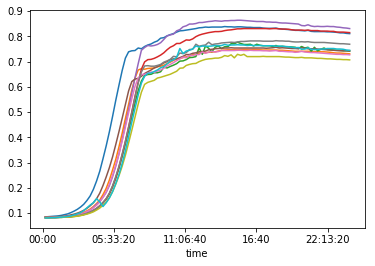

In [63]:
columnas = [x+str(y) for x in ['C', 'D'] for y in range(3,8)]
for i in columnas:
    #print(i)
    plt.plot(df_OD['Time'], df_OD[i])
plt.show()

In [ ]:
import json
with open('data.json', 'w') as outfile:
    json.dump(data, outfile)